In [1]:
# -*- coding:utf-8 -*-
# !/usr/bin/python
# Author: Selvaria
# mnist exercise

import pandas

df_data = pandas.read_csv(r'D:\data\Kaggle\MNIST\train.csv')
df_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#样本形状
#df_test = pandas.read_csv(r'D:\data\Kaggle\MNIST\test.csv')

train_samples= df_data.drop(df_data.columns[0,], axis=1).values
train_samples.shape

(42000, 784)

(28, 28)


<function matplotlib.pyplot.show>

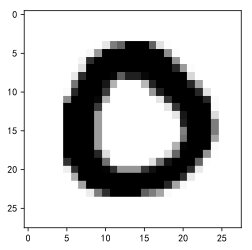

In [4]:
train_single = train_samples.reshape(train_samples.shape[0], 28, 28)
num_single = train_single[4]
print(num_single.shape)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #画的图更清晰

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）
plt.imshow(num_single, cmap=plt.cm.binary)
plt.show

In [6]:
df_test = pandas.read_csv(r'D:\data\Kaggle\MNIST\test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#划分训练集，验证集，测试集
train = df_data.drop(df_data.columns[0,], axis=1)[:30000].values
train_labels = df_data['label'][:30000].values
validation = df_data.drop(df_data.columns[0,], axis=1)[30000:40000].values
vali_labels = df_data['label'][30000:40000].values
test = df_data.drop(df_test.columns[0,], axis=1)[40000:].values
test_labels = df_data['label'][40000:].values

print(train_labels)
print(train.shape)
print(validation.shape)
print(test.shape)

[1 0 1 ... 2 3 0]
(30000, 784)
(10000, 784)
(2000, 784)


In [8]:
#归一化
train = train.astype('float32')/255
validation = validation.astype('float32')/255
test = test.astype('float32')/255

In [ ]:
#使用全连接层，最高值在97.5%左右
from keras.models import Sequential 
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train,
    train_labels,
    epochs=10, 
    batch_size=64, 
    validation_data=(validation,vali_labels)
)

In [ ]:
train_data_cross = df_data.drop(df_train.columns[0,], axis=1)[:40000].values
train_cross_labels = df_data['label'][:40000].values

train_cross = train_data_cross.astype('float32')/255

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_cross,
    train_cross_labels,
    epochs=10, 
    batch_size=128, 
    validation_split=0.1
)

In [10]:
#cnn
#Conv1D，可能是方法不对，只能在40%左右

from keras import preprocessing

train_c1 = df_data.drop(df_data.columns[0,], axis=1)[:40000].values/255
test_c1 = df_data.drop(df_data.columns[0,], axis=1)[40000:].values/255
train_labels_c1 = df_data['label'][:40000].values
test_labels_c1 = df_data['label'][40000:].values

#x_train = preprocessing.sequence.pad_sequences(train_c1, maxlen=max_len)/255
#x_test = preprocessing.sequence.pad_sequences(test_c1, maxlen=max_len)/255

print(train_c1.shape)
print(train_labels_c1)

(40000, 784)
[1 0 1 ... 0 0 3]


In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_c1,
    train_labels_c1,
    epochs=10, 
    batch_size=128
)

result = model.evaluate(test_c1, test_labels_c1)
result

In [ ]:
#使用cnn
#Conv2D 准确率能达到99%以上

import numpy as np
np.random.seed(1337)
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop #优化器采用RMSprop，加速神经网络训练方法

train_c2 = df_data.drop(df_train.columns[0,], axis=1)[:40000].values
test_c2 = df_data.drop(df_train.columns[0,], axis=1)[40000:].values
train_labels_c2 = df_data['label'][:40000].values
test_labels_c2 = df_data['label'][40000:].values

X_train = train_c2.reshape(train_c2.shape[0], 28, 28, 1)
X_test = test_c2.reshape(test_c2.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = np_utils.to_categorical(train_labels_c2, 10)
y_test = np_utils.to_categorical(test_labels_c2, 10)

model = Sequential()

#卷积层Convolutional
model.add(Conv2D(
    filters=32, #从原来的的1张图生成32张图
    kernel_size=(5,5), #filter的宽和
    padding = 'same', #padding method
    input_shape=(28,28,1), #1是高度（黑白是1，彩色是3），后面是高和宽 
    activation ='relu'
))


#取样层pooling
model.add(MaxPooling2D(
    pool_size=(2,2),#
    strides=(2,2), #取样跳过的像素长度
    padding='same'
))

#第2个卷积层Convolutional
model.add(Conv2D(64,(5,5),padding='same',activation ='relu'))

#第2个取样层pooling
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))

#全连接层
model.add(Flatten()) #将三维的层抹平成一维的层
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
#第二个连接层
model.add(Dense(10, activation='softmax'))

#Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#train
print('\nNow training...')
model.fit(X_train, y_train, epochs=7, batch_size=64) 

#test
print('\nNow testing...')
loss, accuracy = model.evaluate(X_test, y_test) 

print('Now test loss:', loss)
print('Now test accuracy:',accuracy)

In [15]:
#构建使用了数据增强的训练集和测试集，基于数据源的array数组，准确率在98.5%

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255, #对图片的每个像素值均乘上这个放缩因子，把像素值放缩到0和1之间有利于模型的收敛
    rotation_range = 40, #角度值，0-180.表示图像随机旋转的角度范围
    width_shift_range = 0.2, #平移比例，下同
    height_shift_range = 0.2,
    shear_range = 0.2, #随机错切变换角度
    zoom_range = 0.2, #随机缩放比例
    horizontal_flip = True, #随机将一半图像水平翻转，主要用于真实世界的图像（即没有水平不对称的假设前提下）
    #zca_whitening=True, #白化处理，只适用于mnist这种只有1条通道的黑白图像，但是本次是传入numpy图像，用不到
    fill_mode='nearest' #填充新创建像素的方法
)

test_datagen = ImageDataGenerator(rescale=1/255) #注意验证集的数据不能增强

train_advance = df_data.drop(df_data.columns[0,], axis=1)[:40000].values
test_advance = df_data.drop(df_data.columns[0,], axis=1)[40000:].values
train_labels_ad = df_data['label'][:40000].values
test_labels_ad = df_data['label'][40000:].values

X_train = train_advance.reshape(train_advance.shape[0], 28, 28, 1)
X_test = test_advance.reshape(test_advance.shape[0], 28, 28, 1)
#X_train = X_train.astype('float32')/255
#X_test = X_test.astype('float32')/255

train_generator = train_datagen.flow(
    x = X_train,
    y = train_labels_ad,
    batch_size = 100 #每批量样本大小
    #class_mode = 'categorical' #因为使用了categorical_crossentropy损失函数，所以用二进制标签
)

test_generator = test_datagen.flow(
    x = X_test, 
    y = test_labels_ad,
    batch_size = 100
    #class_mode = 'categorical' 
)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32,(3,3), padding='same', input_shape=(28,28,1), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(64,(3,3),padding='same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3), activation='relu')) 
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) #将三维的层抹平成一维的层
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 400, #40000/100
    epochs = 25, #增加了训练批次
    validation_data = test_generator, 
    validation_steps = 20 #2000/100
)

Epoch 1/25
400/400 [==============================] - 26s 64ms/step - loss: 1.5957 - acc: 0.4374 - val_loss: 0.5686 - val_acc: 0.8220
Epoch 2/25
400/400 [==============================] - 24s 61ms/step - loss: 0.9929 - acc: 0.6646 - val_loss: 0.3278 - val_acc: 0.8945
Epoch 3/25
400/400 [==============================] - 24s 61ms/step - loss: 0.7521 - acc: 0.7487 - val_loss: 0.2554 - val_acc: 0.9135
Epoch 4/25
400/400 [==============================] - 24s 61ms/step - loss: 0.6235 - acc: 0.7970 - val_loss: 0.2084 - val_acc: 0.9330
Epoch 5/25
400/400 [==============================] - 24s 61ms/step - loss: 0.5496 - acc: 0.8220 - val_loss: 0.1763 - val_acc: 0.9500
Epoch 6/25
400/400 [==============================] - 24s 61ms/step - loss: 0.4956 - acc: 0.8437 - val_loss: 0.1511 - val_acc: 0.9595
Epoch 7/25
400/400 [==============================] - 25s 62ms/step - loss: 0.4618 - acc: 0.8517 - val_loss: 0.1551 - val_acc: 0.9525
Epoch 8/25
400/400 [==============================] - 24s 61ms

In [14]:
print(model.evaluate_generator(test_generator, steps = 40))

[0.08538597835140535, 0.9749999940395355]
